# Results Analysis

In [ ]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
file_path = "final_output/combinedOutput_cleaned.csv"
df = pandas.read_csv(file_path, encoding='utf-8')

In [ ]:
df.info()

In [ ]:
df["LLM-Con"].unique()

In [ ]:
df["LLM-Sim"].unique()

In [ ]:
file_path = "final_output/daOutput_cleaned.csv"
df_da = pandas.read_csv(file_path, encoding='utf-8')
df_da.info()

In [ ]:
file_path = "final_output/enOutput_cleaned.csv"
df_en = pandas.read_csv(file_path, encoding='utf-8')
df_en.info()

## Results

### Combined Dataset

In [ ]:
columns_of_interest = ['BLEU', 'METEOR', 'Rouge1 r', 'Rouge1 p', 'Rouge1 f', 'Rouge2 r', 'Rouge2 p', 'Rouge2 f', 
                       'Rougel r', 'Rougel p', 'Rougel f', 'LLM-Sim', 'LLM-Con']

mean_by_strategy = df.groupby("tamperingType")[columns_of_interest].mean()
mean_global = df.groupby("tamperingType")[columns_of_interest].mean()
median_by_strategy = df.groupby("tamperingType")[columns_of_interest].median()
std_by_strategy = df.groupby("tamperingType")[columns_of_interest].std()

print("Mean by Tampering Strategy:\n", mean_by_strategy)
print("\nMedian by Tampering Strategy:\n", median_by_strategy)
print("\nStandard Deviation by Tampering Strategy:\n", std_by_strategy)

mean_values = df[columns_of_interest].mean()
median_values = df[columns_of_interest].median()
std_values = df[columns_of_interest].std()

print("\nOverall Mean:\n", mean_values)
print("\nOverall Median:\n", median_values)
print("\nOverall Standard Deviation:\n", std_values)

z_scores = (mean_by_strategy - mean_values) / std_values
print("\nZ-scores for Tampering Strategies:\n", z_scores)

def z_bin(value):
    if value > 0.5:
        return "High"
    elif value < -0.5:
        return "Low"
    else:
        return "Medium"

z_bins = z_scores.applymap(z_bin)
print("\nZ-Score Bins (Low/Medium/High):\n", z_bins)

percentile_bins = mean_by_strategy.rank(method='first').apply(
    lambda col: pandas.qcut(col, q=[0, 0.3, 0.7, 1.0], labels=["Low", "Medium", "High"])
)

print("\nPercentile Bins (Low/Medium/High):\n", percentile_bins)

### English Dataset

In [ ]:
columns_of_interest = ['BLEU', 'METEOR', 'Rouge1 r', 'Rouge1 p', 'Rouge1 f', 'Rouge2 r', 'Rouge2 p', 'Rouge2 f', 
                       'Rougel r', 'Rougel p', 'Rougel f', 'LLM-Sim', 'LLM-Con']

mean_by_strategy_en = df_en.groupby("tamperingType")[columns_of_interest].mean()
median_by_strategy_en = df_en.groupby("tamperingType")[columns_of_interest].median()
std_by_strategy_en = df_en.groupby("tamperingType")[columns_of_interest].std()

print("Mean by Tampering Strategy:\n", mean_by_strategy_en)
print("\nMedian by Tampering Strategy:\n", median_by_strategy_en)
print("\nStandard Deviation by Tampering Strategy:\n", std_by_strategy_en)

mean_values_en = df_en[columns_of_interest].mean()
median_values_en = df_en[columns_of_interest].median()
std_values_en = df_en[columns_of_interest].std()

print("\nOverall Mean:\n", mean_values_en)
print("\nOverall Median:\n", median_values_en)
print("\nOverall Standard Deviation:\n", std_values_en)

### Danish Dataset

In [ ]:
columns_of_interest = ['BLEU', 'METEOR', 'Rouge1 r', 'Rouge1 p', 'Rouge1 f', 'Rouge2 r', 'Rouge2 p', 'Rouge2 f', 
                       'Rougel r', 'Rougel p', 'Rougel f', 'LLM-Sim', 'LLM-Con']

mean_by_strategy_da = df_da.groupby("tamperingType")[columns_of_interest].mean()
median_by_strategy_da = df_da.groupby("tamperingType")[columns_of_interest].median()
std_by_strategy_da = df_da.groupby("tamperingType")[columns_of_interest].std()

print("Mean by Tampering Strategy:\n", mean_by_strategy_da)
print("\nMedian by Tampering Strategy:\n", median_by_strategy_da)
print("\nStandard Deviation by Tampering Strategy:\n", std_by_strategy_da)

mean_values_da = df_da[columns_of_interest].mean()
median_values_da = df_da[columns_of_interest].median()
std_values_da = df_da[columns_of_interest].std()

print("\nOverall Mean:\n", mean_values_da)
print("\nOverall Median:\n", median_values_da)
print("\nOverall Standard Deviation:\n", std_values_da)

## Plots mean and median for each metrics

### Combined Dataset

In [ ]:
assert mean_by_strategy.index.to_list() == median_by_strategy.index.to_list()

In [ ]:
tampering_types = df["tamperingType"].unique()

width = 0.2 
x = np.arange(len(tampering_types)) 

for column in columns_of_interest:
    fig, ax = plt.subplots(figsize=(16, 6))  

    mean_values = mean_by_strategy[column].values
    median_values = median_by_strategy[column].values

    bars1 = ax.bar(x - width/2, mean_values, width, label=f'Mean {column}', color='blue')

    bars2 = ax.bar(x + width/2, median_values, width, label=f'Median {column}', color='orange')

    for bar in bars1:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.04, 
                f'{bar.get_height():.2f}', ha='center', va='top', fontsize=10, color='black')

    for bar in bars2:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.04, 
                f'{bar.get_height():.2f}', ha='center', va='top', fontsize=10, color='black')

    ax.set_ylabel('Value')
    ax.set_title(f'Mean vs Median for {column} - Combined Dataset')
    ax.set_xticks(x)
    ax.set_xticklabels(mean_by_strategy.index, rotation = 20, fontsize=12) 
    ax.legend()

    plt.tight_layout()  
    plt.show()

### English Dataset

In [ ]:
assert mean_by_strategy_en.index.to_list() == median_by_strategy_en.index.to_list()

In [ ]:
tampering_types = df_en["tamperingType"].unique()

width = 0.2 
x = np.arange(len(tampering_types)) 

for column in columns_of_interest:
    fig, ax = plt.subplots(figsize=(16, 6))  

    mean_values_en = mean_by_strategy_en[column].values
    median_values_en = median_by_strategy_en[column].values

    bars1 = ax.bar(x - width/2, mean_values_en, width, label=f'Mean {column}', color='blue')

    bars2 = ax.bar(x + width/2, median_values_en, width, label=f'Median {column}', color='orange')

    for bar in bars1:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.04, 
                f'{bar.get_height():.2f}', ha='center', va='top', fontsize=10, color='black')

    for bar in bars2:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.04, 
                f'{bar.get_height():.2f}', ha='center', va='top', fontsize=10, color='black')

    ax.set_ylabel('Value')
    ax.set_title(f'Mean vs Median for {column} - English Dataset')
    ax.set_xticks(x)
    ax.set_xticklabels(mean_by_strategy_en.index, rotation = 20, fontsize=12) 
    ax.legend()

    plt.tight_layout()  
    plt.show()

### Danish Dataset

In [ ]:
assert mean_by_strategy_da.index.to_list() == median_by_strategy_da.index.to_list()

In [ ]:
tampering_types = df_da["tamperingType"].unique()

width = 0.2 
x = np.arange(len(tampering_types)) 

for column in columns_of_interest:
    fig, ax = plt.subplots(figsize=(16, 6))  

    mean_values_da = mean_by_strategy_da[column].values
    median_values_da = median_by_strategy_da[column].values

    bars1 = ax.bar(x - width/2, mean_values_da, width, label=f'Mean {column}', color='blue')

    bars2 = ax.bar(x + width/2, median_values_da, width, label=f'Median {column}', color='orange')

    for bar in bars1:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.04, 
                f'{bar.get_height():.2f}', ha='center', va='top', fontsize=10, color='black')

    for bar in bars2:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.04, 
                f'{bar.get_height():.2f}', ha='center', va='top', fontsize=10, color='black')

    ax.set_ylabel('Value')
    ax.set_title(f'Mean vs Median for {column} - Danish Dataset')
    ax.set_xticks(x)
    ax.set_xticklabels(mean_by_strategy_da.index, rotation = 20, fontsize=12) 
    ax.legend()

    plt.tight_layout()  
    plt.show()


## Error bars using mean and std

### Combined Dataset

In [ ]:
tampering_types = df["tamperingType"].unique()

bleu_mean = df.groupby("tamperingType")["BLEU"].mean()
meteor_mean = df.groupby("tamperingType")["METEOR"].mean()
rouge_mean = df.groupby("tamperingType")["Rougel f"].mean()  
llm_mean = df.groupby("tamperingType")["LLM-Sim"].mean()


bleu_std = df.groupby("tamperingType")["BLEU"].std()
meteor_std = df.groupby("tamperingType")["METEOR"].std()
rouge_std = df.groupby("tamperingType")["Rougel f"].std()
llm_std = df.groupby("tamperingType")["LLM-Sim"].std()

assert bleu_mean.index.to_list() == meteor_mean.index.to_list() == rouge_mean.index.to_list() == llm_mean.index.to_list()

In [ ]:
x = np.arange(len(tampering_types))  
width = 0.2 

fig, ax = plt.subplots(figsize=(14, 6))

bars1 = ax.bar(x - width, bleu_mean, width, yerr=bleu_std, capsize=5, label="BLEU", color="blue")

bars2 = ax.bar(x, meteor_mean, width, yerr=meteor_std, capsize=5, label="METEOR", color="orange")

bars3 = ax.bar(x + width, rouge_mean, width, yerr=rouge_std, capsize=5, label="ROUGE-L F1", color="green")

bars4 = ax.bar(x + width*2, llm_mean, width, yerr=llm_std, capsize=5, label="LLM Score", color="red")

ax.set_ylabel("Score")
ax.set_title("Comparison of BLEU, METEOR, ROUGE-L (F1), and LLM Score with Error Bars - Combined Dataset")
ax.set_xticks(x)
ax.set_xticklabels(bleu_mean.index, rotation=30, fontsize=12)
ax.legend()
ax.grid()

plt.tight_layout()
plt.show()


### English Dataset

In [ ]:
tampering_types = df_en["tamperingType"].unique()

bleu_mean_en = df_en.groupby("tamperingType")["BLEU"].mean()
meteor_mean_en = df_en.groupby("tamperingType")["METEOR"].mean()
rouge_mean_en = df_en.groupby("tamperingType")["Rougel f"].mean()  
llm_mean_en = df_en.groupby("tamperingType")["LLM-Sim"].mean()


bleu_std_en = df_en.groupby("tamperingType")["BLEU"].std()
meteor_std_en = df_en.groupby("tamperingType")["METEOR"].std()
rouge_std_en = df_en.groupby("tamperingType")["Rougel f"].std()
llm_std_en = df_en.groupby("tamperingType")["LLM-Sim"].std()

assert bleu_mean_en.index.to_list() == meteor_mean_en.index.to_list() == rouge_mean_en.index.to_list() == llm_mean_en.index.to_list()

In [ ]:
x = np.arange(len(tampering_types))  
width = 0.2 

fig, ax = plt.subplots(figsize=(14, 6))

bars1 = ax.bar(x - width, bleu_mean_en, width, yerr=bleu_std_en, capsize=5, label="BLEU", color="blue")

bars2 = ax.bar(x, meteor_mean_en, width, yerr=meteor_std_en, capsize=5, label="METEOR", color="orange")

bars3 = ax.bar(x + width, rouge_mean_en, width, yerr=rouge_std_en, capsize=5, label="ROUGE-L F1", color="green")

bars4 = ax.bar(x + width*2, llm_mean_en, width, yerr=llm_std_en, capsize=5, label="LLM Score", color="red")

ax.set_ylabel("Score")
ax.set_title("Comparison of BLEU, METEOR, ROUGE-L (F1), and LLM Score with Error Bars - English Dataset")
ax.set_xticks(x)
ax.set_xticklabels(bleu_mean_en.index, rotation=30, fontsize=12)
ax.legend()
ax.grid()

plt.tight_layout()
plt.show()


### Danish Dataset

In [ ]:
tampering_types = df_da["tamperingType"].unique()

bleu_mean_da = df_da.groupby("tamperingType")["BLEU"].mean()
meteor_mean_da = df_da.groupby("tamperingType")["METEOR"].mean()
rouge_mean_da = df_da.groupby("tamperingType")["Rougel f"].mean()  
llm_mean_da = df_da.groupby("tamperingType")["LLM-Sim"].mean()


bleu_std_da = df_da.groupby("tamperingType")["BLEU"].std()
meteor_std_da = df_da.groupby("tamperingType")["METEOR"].std()
rouge_std_da = df_da.groupby("tamperingType")["Rougel f"].std()
llm_std_da = df_da.groupby("tamperingType")["LLM-Sim"].std()

assert bleu_mean_da.index.to_list() == meteor_mean_da.index.to_list() == rouge_mean_da.index.to_list() == llm_mean_da.index.to_list()

In [ ]:

x = np.arange(len(tampering_types))  
width = 0.2 

fig, ax = plt.subplots(figsize=(14, 6))

bars1 = ax.bar(x - width, bleu_mean_da, width, yerr=bleu_std_da, capsize=5, label="BLEU", color="blue")

bars2 = ax.bar(x, meteor_mean_da, width, yerr=meteor_std_da, capsize=5, label="METEOR", color="orange")

bars3 = ax.bar(x + width, rouge_mean_da, width, yerr=rouge_std_da, capsize=5, label="ROUGE-L F1", color="green")

bars4 = ax.bar(x + width*2, llm_mean_da, width, yerr=llm_std_da, capsize=5, label="LLM Score", color="red")

ax.set_ylabel("Score")
ax.set_title("Comparison of BLEU, METEOR, ROUGE-L (F1), and LLM Score with Error Bars - Danish Dataset")
ax.set_xticks(x)
ax.set_xticklabels(bleu_mean_da.index, rotation=30, fontsize=12)
ax.legend()
ax.grid()

plt.tight_layout()
plt.show()


## Error bars using mean and min/max

### Combined Dataset

In [ ]:
tampering_types = df["tamperingType"].unique()

bleu_mean = df.groupby("tamperingType")["BLEU"].mean()
meteor_mean = df.groupby("tamperingType")["METEOR"].mean()
rouge_mean = df.groupby("tamperingType")["Rougel f"].mean()
llm_mean = df.groupby("tamperingType")["LLM-Sim"].mean()

bleu_min = df.groupby("tamperingType")["BLEU"].min()
bleu_max = df.groupby("tamperingType")["BLEU"].max()

meteor_min = df.groupby("tamperingType")["METEOR"].min()
meteor_max = df.groupby("tamperingType")["METEOR"].max()

rouge_min = df.groupby("tamperingType")["Rougel f"].min()
rouge_max = df.groupby("tamperingType")["Rougel f"].max()

llm_min = df.groupby("tamperingType")["LLM-Sim"].min()
llm_max = df.groupby("tamperingType")["LLM-Sim"].max()

assert bleu_mean.index.to_list() == meteor_mean.index.to_list() == rouge_mean.index.to_list() == llm_mean.index.to_list()

In [ ]:
bleu_errors = [bleu_mean - bleu_min, bleu_max - bleu_mean]
meteor_errors = [meteor_mean - meteor_min, meteor_max - meteor_mean]
rouge_errors = [rouge_mean - rouge_min, rouge_max - rouge_mean]
llm_errors = [llm_mean - llm_min, llm_max - llm_mean]

x = np.arange(len(tampering_types))  
width = 0.2

fig, ax = plt.subplots(figsize=(14, 6))

bars1 = ax.bar(x - width, bleu_mean, width, yerr=bleu_errors, capsize=5, label="BLEU", color="blue")

bars2 = ax.bar(x, meteor_mean, width, yerr=meteor_errors, capsize=5, label="METEOR", color="orange")

bars3 = ax.bar(x + width, rouge_mean, width, yerr=rouge_errors, capsize=5, label="ROUGE-L F1", color="green")

bars4 = ax.bar(x + width*2, llm_mean, width, yerr=llm_errors, capsize=5, label="LLM Score", color="red")

ax.set_ylabel("Score")
ax.set_title("Comparison of BLEU, METEOR, ROUGE-L (F1) and LLM Score with Min/Max Error Bars - Combined Dataset")
ax.set_xticks(x)
ax.set_xticklabels(bleu_mean.index, rotation=30, fontsize=12)
ax.legend()
ax.grid()

plt.tight_layout()
plt.show()


### English Dataset:

In [ ]:
tampering_types = df_en["tamperingType"].unique()

bleu_mean_en = df_en.groupby("tamperingType")["BLEU"].mean()
meteor_mean_en = df_en.groupby("tamperingType")["METEOR"].mean()
rouge_mean_en = df_en.groupby("tamperingType")["Rougel f"].mean()
llm_mean_en = df_en.groupby("tamperingType")["LLM-Sim"].mean()

bleu_min_en = df_en.groupby("tamperingType")["BLEU"].min()
bleu_max_en = df_en.groupby("tamperingType")["BLEU"].max()

meteor_min_en = df_en.groupby("tamperingType")["METEOR"].min()
meteor_max_en = df_en.groupby("tamperingType")["METEOR"].max()

rouge_min_en = df_en.groupby("tamperingType")["Rougel f"].min()
rouge_max_en = df_en.groupby("tamperingType")["Rougel f"].max()

llm_min_en = df_en.groupby("tamperingType")["LLM-Sim"].min()
llm_max_en = df_en.groupby("tamperingType")["LLM-Sim"].max()

assert bleu_mean_en.index.to_list() == meteor_mean_en.index.to_list() == rouge_mean_en.index.to_list() == llm_mean_en.index.to_list()

In [ ]:
bleu_errors_en = [bleu_mean_en - bleu_min_en, bleu_max_en - bleu_mean_en]
meteor_errors_en = [meteor_mean_en - meteor_min_en, meteor_max_en - meteor_mean_en]
rouge_errors_en = [rouge_mean_en - rouge_min_en, rouge_max_en - rouge_mean_en]
llm_errors_en = [llm_mean_en - llm_min_en, llm_max_en - llm_mean_en]

x = np.arange(len(tampering_types))  
width = 0.2

fig, ax = plt.subplots(figsize=(14, 6))

bars1 = ax.bar(x - width, bleu_mean_en, width, yerr=bleu_errors_en, capsize=5, label="BLEU", color="blue")

bars2 = ax.bar(x, meteor_mean_en, width, yerr=meteor_errors_en, capsize=5, label="METEOR", color="orange")

bars3 = ax.bar(x + width, rouge_mean_en, width, yerr=rouge_errors_en, capsize=5, label="ROUGE-L F1", color="green")

bars4 = ax.bar(x + width*2, llm_mean_en, width, yerr=llm_errors_en, capsize=5, label="LLM Score", color="red")

ax.set_ylabel("Score")
ax.set_title("Comparison of BLEU, METEOR, ROUGE-L (F1) and LLM Score with Min/Max Error Bars - English Dataset")
ax.set_xticks(x)
ax.set_xticklabels(bleu_mean_en.index, rotation=30, fontsize=12)
ax.legend()
ax.grid()

plt.tight_layout()
plt.show()


### Danish Dataset

In [ ]:
tampering_types = df_da["tamperingType"].unique()

bleu_mean_da = df_da.groupby("tamperingType")["BLEU"].mean()
meteor_mean_da = df_da.groupby("tamperingType")["METEOR"].mean()
rouge_mean_da = df_da.groupby("tamperingType")["Rougel f"].mean()
llm_mean_da = df_da.groupby("tamperingType")["LLM-Sim"].mean()

bleu_min_da = df_da.groupby("tamperingType")["BLEU"].min()
bleu_max_da = df_da.groupby("tamperingType")["BLEU"].max()

meteor_min_da = df_da.groupby("tamperingType")["METEOR"].min()
meteor_max_da = df_da.groupby("tamperingType")["METEOR"].max()

rouge_min_da = df_da.groupby("tamperingType")["Rougel f"].min()
rouge_max_da = df_da.groupby("tamperingType")["Rougel f"].max()

llm_min_da = df_da.groupby("tamperingType")["LLM-Sim"].min()
llm_max_da = df_da.groupby("tamperingType")["LLM-Sim"].max()

assert bleu_mean_da.index.to_list() == meteor_mean_da.index.to_list() == rouge_mean_da.index.to_list() == llm_mean_da.index.to_list()

In [ ]:
bleu_errors_da = [bleu_mean_da - bleu_min_da, bleu_max_da - bleu_mean_da]
meteor_errors_da = [meteor_mean_da - meteor_min_da, meteor_max_da - meteor_mean_da]
rouge_errors_da = [rouge_mean_da - rouge_min_da, rouge_max_da - rouge_mean_da]
llm_errors_da = [llm_mean_da - llm_min_da, llm_max_da - llm_mean_da]

x = np.arange(len(tampering_types))  
width = 0.2

fig, ax = plt.subplots(figsize=(14, 6))

bars1 = ax.bar(x - width, bleu_mean_da, width, yerr=bleu_errors_da, capsize=5, label="BLEU", color="blue")
bars2 = ax.bar(x, meteor_mean_da, width, yerr=meteor_errors_da, capsize=5, label="METEOR", color="orange")
bars3 = ax.bar(x + width, rouge_mean_da, width, yerr=rouge_errors_da, capsize=5, label="ROUGE-L F1", color="green")
bars4 = ax.bar(x + width*2, llm_mean_da, width, yerr=llm_errors_da, capsize=5, label="LLM Score", color="red")

ax.set_ylabel("Score")
ax.set_title("Comparison of BLEU, METEOR, ROUGE-L (F1) and LLM Score with Min/Max Error Bars - Danish Dataset")
ax.set_xticks(x)
ax.set_xticklabels(bleu_mean_da.index, rotation=30, fontsize=12)
ax.legend()
ax.grid()

plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.displot.html

tampering_types = df["tamperingType"].unique()

columns_of_interest = ['BLEU', 'METEOR', 'Rougel f', 'LLM-Sim']

for col in columns_of_interest:
    for tam_type in tampering_types:
        g = sns.displot(data=df[(df["tamperingType"]==tam_type)], x=col, kde=True, bins = 10)
        g.set_axis_labels(f"{col} Score", "Frequency")
        g.set(title = f"{col} - {tam_type} - Combined Dataset")
    

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.displot.html
tampering_types = df_en["tamperingType"].unique()

columns_of_interest = ['BLEU', 'METEOR', 'Rougel f', 'LLM-Sim']

for col in columns_of_interest:
    for tam_type in tampering_types:
        g = sns.displot(data=df_en[(df_en["tamperingType"]==tam_type)], x=col, kde=True, bins = 10)
        g.set_axis_labels(f"{col} Score", "Frequency")
        g.set(title = f"{col} - {tam_type} - English Dataset")
    

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.displot.html
tampering_types = df_da["tamperingType"].unique()

columns_of_interest = ['BLEU', 'METEOR', 'Rougel f', 'LLM-Sim']

for col in columns_of_interest:
    for tam_type in tampering_types:
        g = sns.displot(data=df_da[(df_da["tamperingType"]==tam_type)], x=col, kde=True, bins = 10)
        g.set_axis_labels(f"{col} Score", "Frequency")
        g.set(title = f"{col} - {tam_type} - Danish Dataset")
    

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

dfMet = df[['BLEU', 'METEOR', 'Rouge1 r', 'Rouge1 p', 'Rouge1 f', 'Rouge2 r', 'Rouge2 p', 'Rouge2 f', 
                       'Rougel r', 'Rougel p', 'Rougel f', 'LLM-Sim']]
corr = dfMet.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", square=True, linewidths=0.5)

plt.title('Metric Correlation Matrix')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import seaborn as sns

strategy_means = df.groupby("tamperingType").mean(numeric_only=True)
scaler = StandardScaler()
normalized = scaler.fit_transform(strategy_means)


# Create the linkage matrix and plot dendrogram
linked = linkage(normalized, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked, labels=strategy_means.index.tolist(), leaf_rotation=90)
plt.title("Hierarchical Clustering of Tampering Strategies")
plt.show()

cluster_labels = fcluster(linked, t=3, criterion='maxclust')  # change `t` based on the plot
strategy_means['cluster'] = cluster_labels

sns.heatmap(strategy_means.drop("cluster", axis=1), annot=True, cmap="viridis", xticklabels=True, yticklabels=strategy_means.index)
plt.title("Mean Metric Scores per Tampering Strategy")
plt.show()



# Analysis after the length of sentences

In [ ]:
tampering_types = df["tamperingType"].unique()
for tam in tampering_types:
    bleu_scores = []
    meteor_scores = []
    rouge_scores = []
    llm_scores = []

    for i in range(1,11):
        file_path = f"bins/output_bin_{i}.csv"
        df = pandas.read_csv(file_path, encoding='utf-8')
        
        df_filtered = df[df["tamperingType"] == tam]
        bleu_scores.append(df_filtered["BLEU"].mean())
        meteor_scores.append(df_filtered["METEOR"].mean())
        rouge_scores.append(df_filtered["Rougel f"].mean())
        llm_scores.append(df_filtered["LLM-Sim"].mean())


    x_labels = [i for i in range(1,11)]
    x = list(range(1,11))
    plt.scatter(x, bleu_scores, color="blue", marker="o", label="BLEU")
    plt.scatter(x, meteor_scores, color="red", marker="x", label="METEOR")
    plt.scatter(x, rouge_scores, color="green", marker="^", label="ROUGE-L F1")
    plt.scatter(x, llm_scores, color="orange", marker="s", label="LLMScore")

    plt.xticks(x, x_labels)
    plt.yticks([i/20 for i in range(21)]) 
    plt.ylim(0, 1.05) 
    plt.xlabel("Bins")
    plt.ylabel("Score")
    plt.title(f"Average Scores per Bin - {tam}")
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

for i in range(1,11):
    file_path = f"bins/output_bin_{i}.csv"
    df = pandas.read_csv(file_path, encoding='utf-8')

    dfMet = df[['BLEU', 'METEOR', 'Rouge1 r', 'Rouge1 p', 'Rouge1 f', 'Rouge2 r', 'Rouge2 p', 'Rouge2 f', 
                        'Rougel r', 'Rougel p', 'Rougel f', 'LLM-Sim']]
    corr = dfMet.corr()

    mask = np.triu(np.ones_like(corr, dtype=bool))

    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", square=True, linewidths=0.5)

    plt.title(f'Metric Correlation Matrix - Bin {i}')
    plt.show()

# Human Score Analysis

In [1]:
import pandas as pd

df = pd.read_csv('human_score/humanScoring.csv')

with open('human_score/Oskar') as f1, open('human_score/Nhu') as f2, open('human_score/Christina') as f3:
    nums1 = [float(line.strip()) for line in f1]
    nums2 = [float(line.strip()) for line in f2]
    nums3 = [float(line.strip()) for line in f3]

mean_values = [(a + b + c) / 3 for a, b, c in zip(nums1, nums2, nums3)]

df['humanMean'] = mean_values

df.to_csv('human_score/humanScores.csv', index=False)


In [2]:
import pandas as pd

df = pd.read_csv("human_score/humanScores.csv")
columns_to_keep = ['tamperingType', 'humanMean']
df_filtered = df[columns_to_keep]

result = df_filtered.groupby('tamperingType').mean()

print(result)

                       humanMean
tamperingType                   
Letter Duplication      0.880667
Letter Order Swapping   0.713667
Letter Removal          0.620000
Letter Replacement      0.644333
Negation Removal        0.201667
Random Word Addition    0.552333
Word Duplication        0.856000
Word Order Swapping     0.676667
Word Removal            0.644667
Word Replacement        0.471667


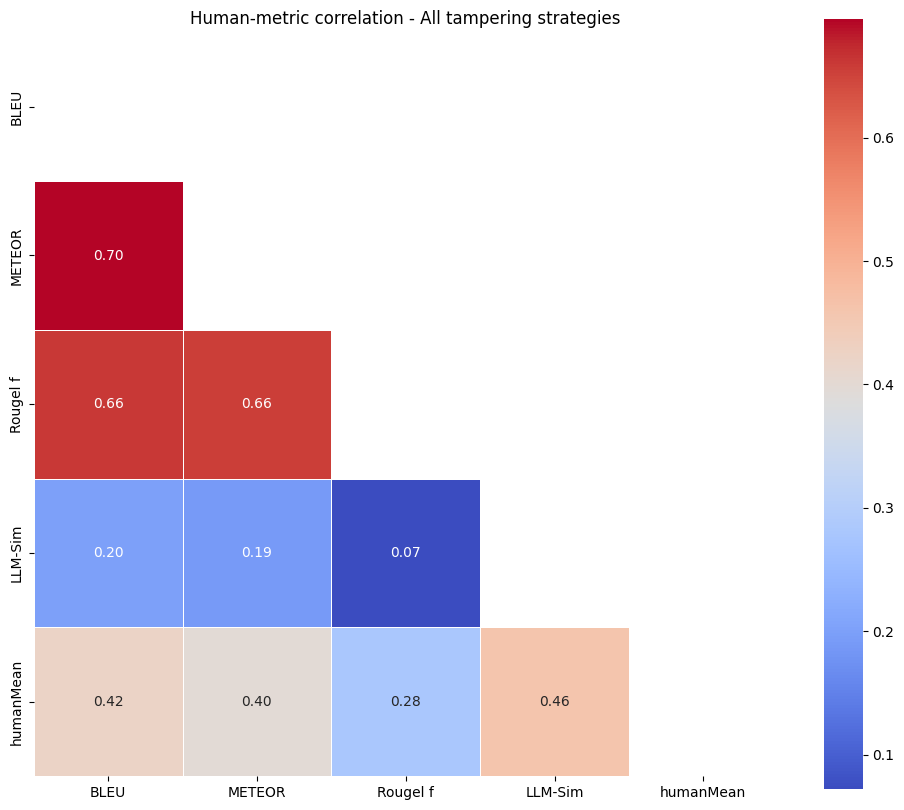

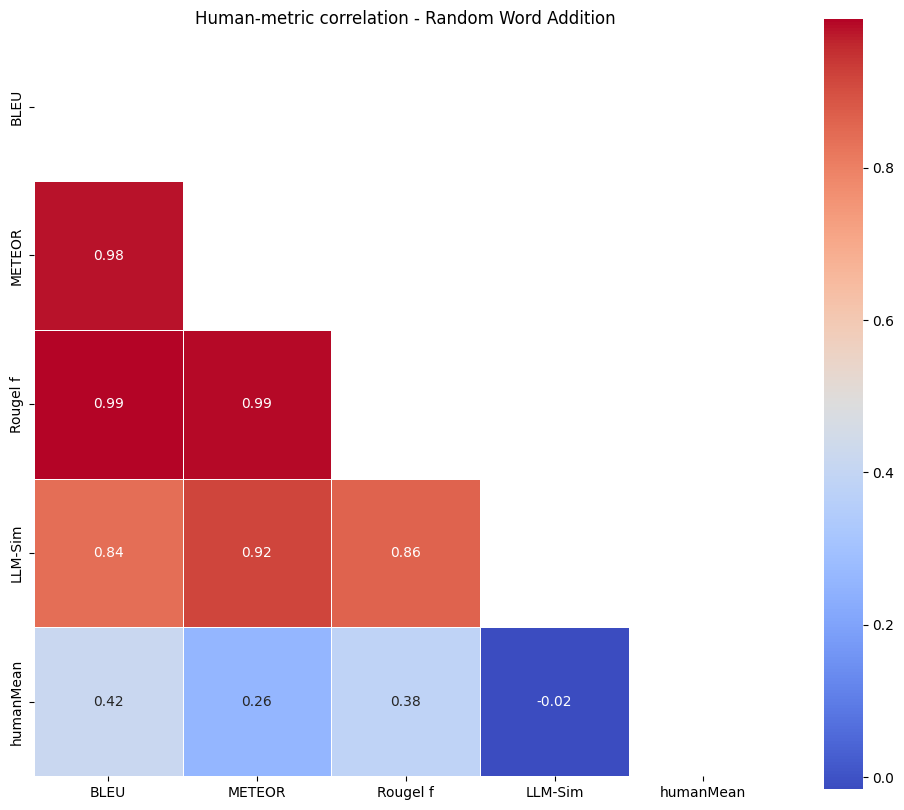

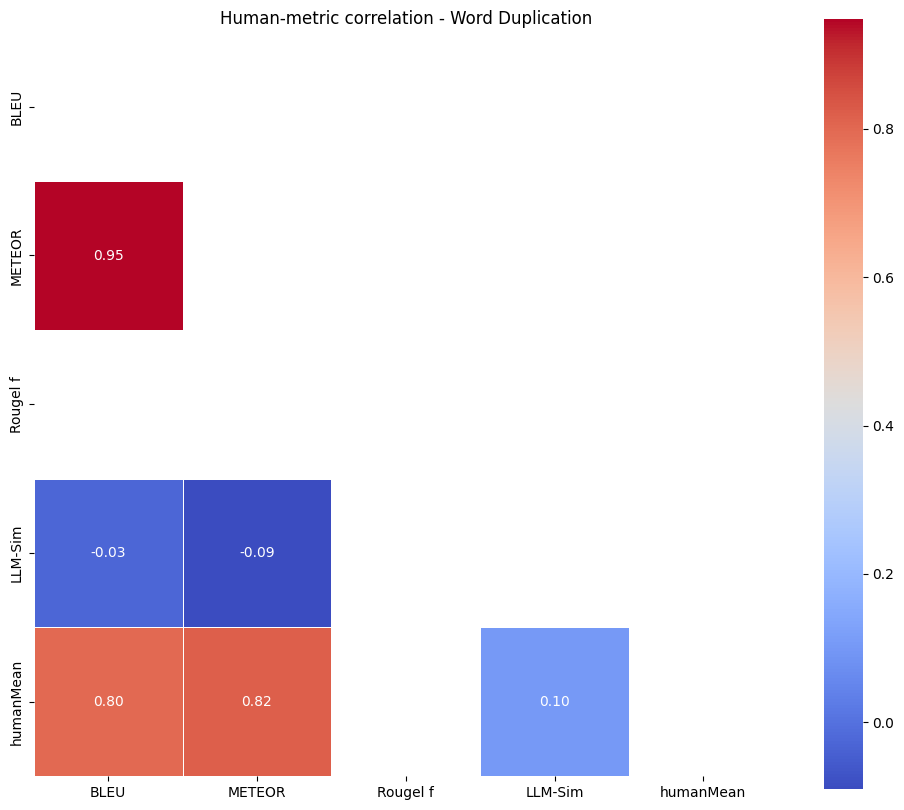

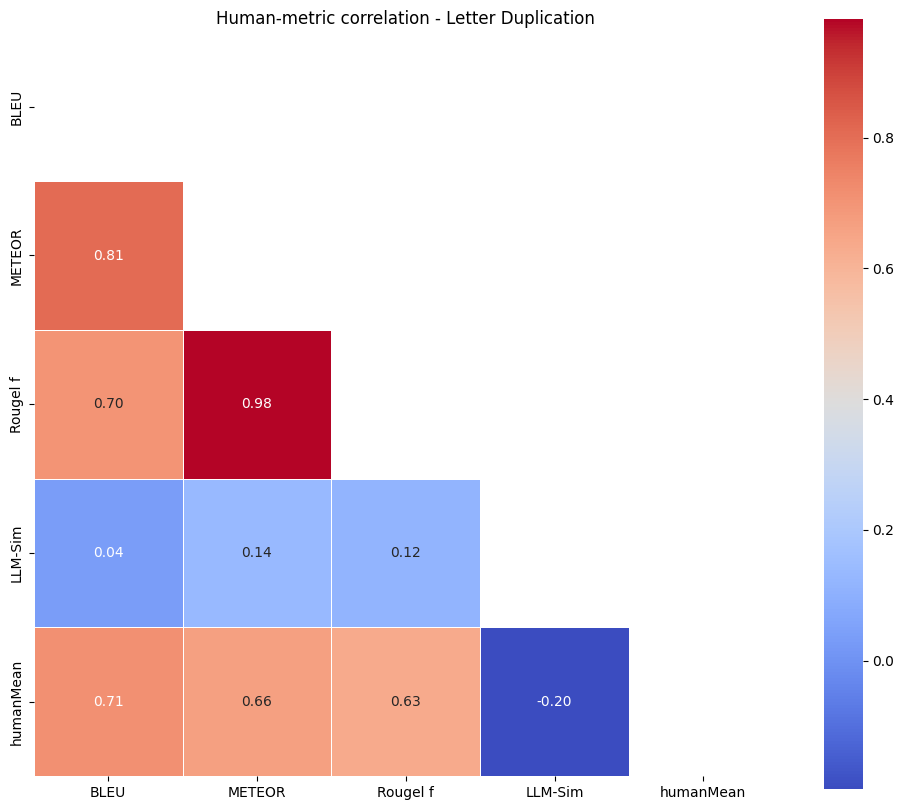

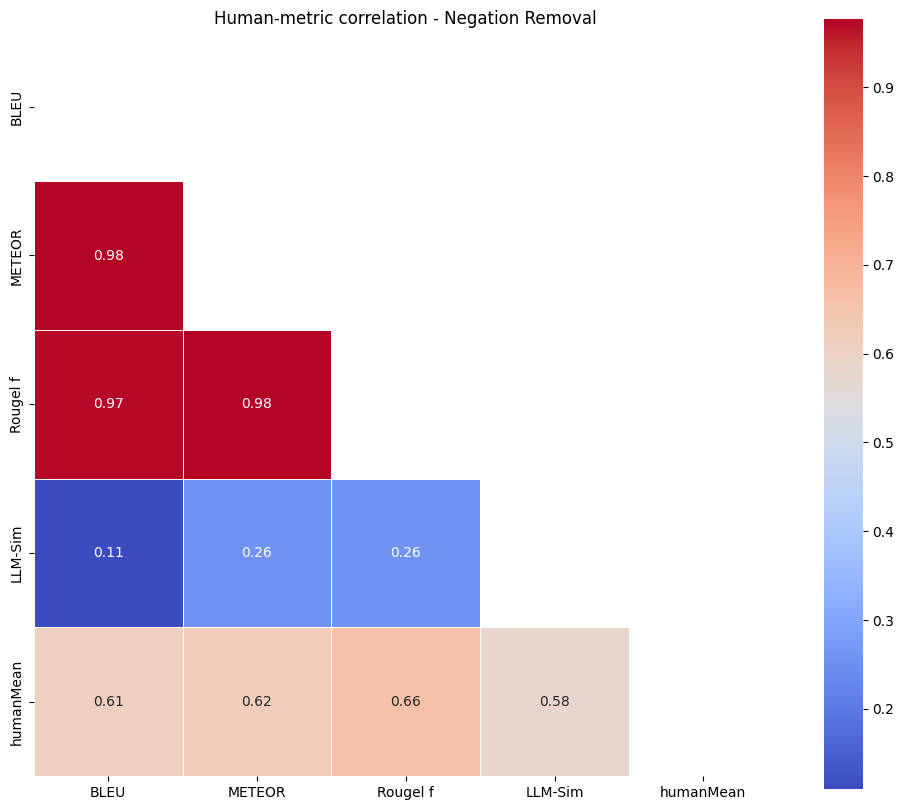

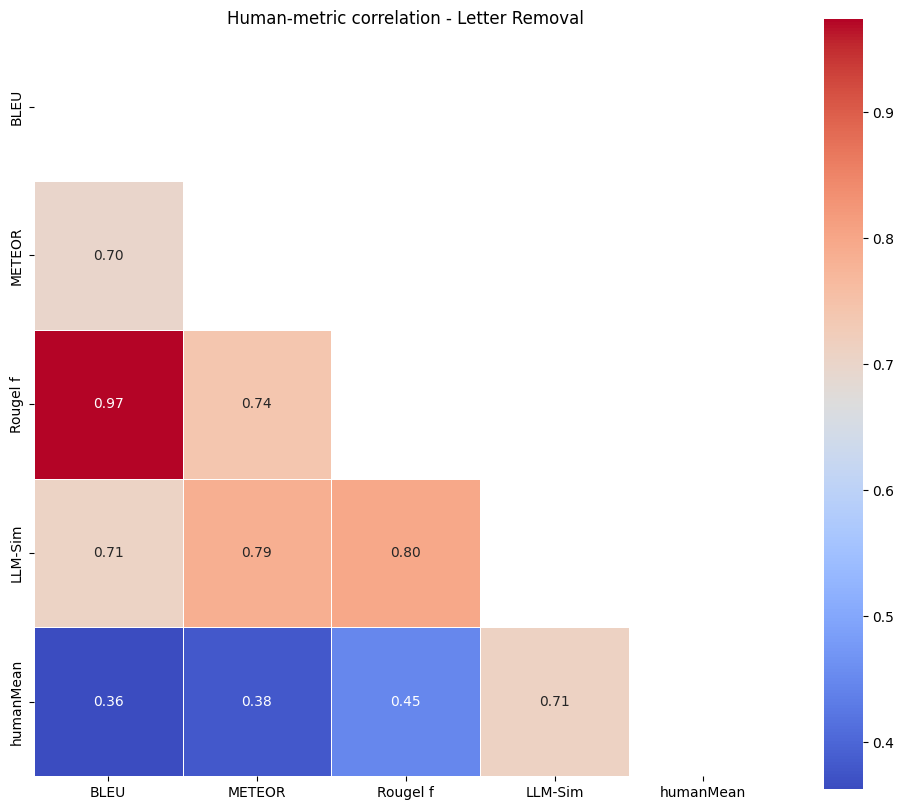

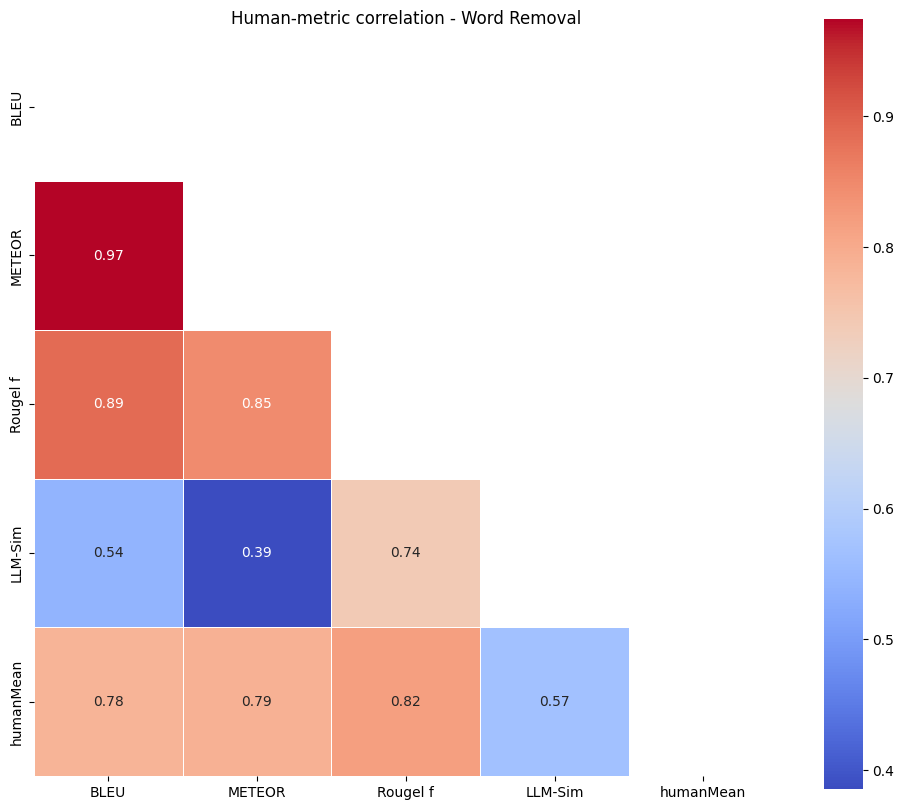

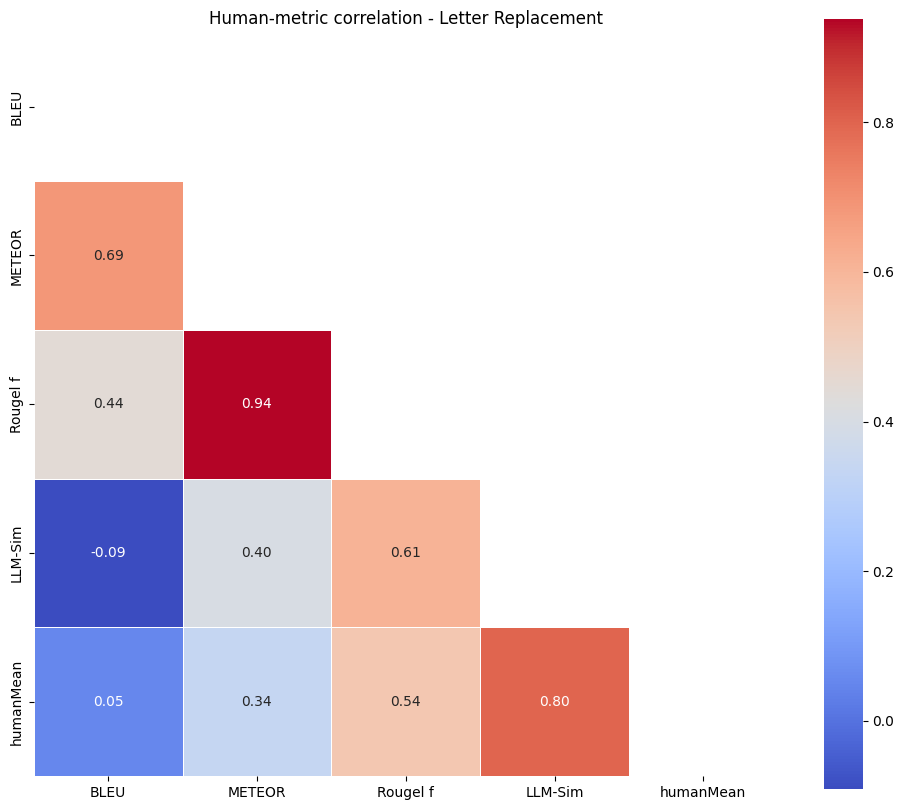

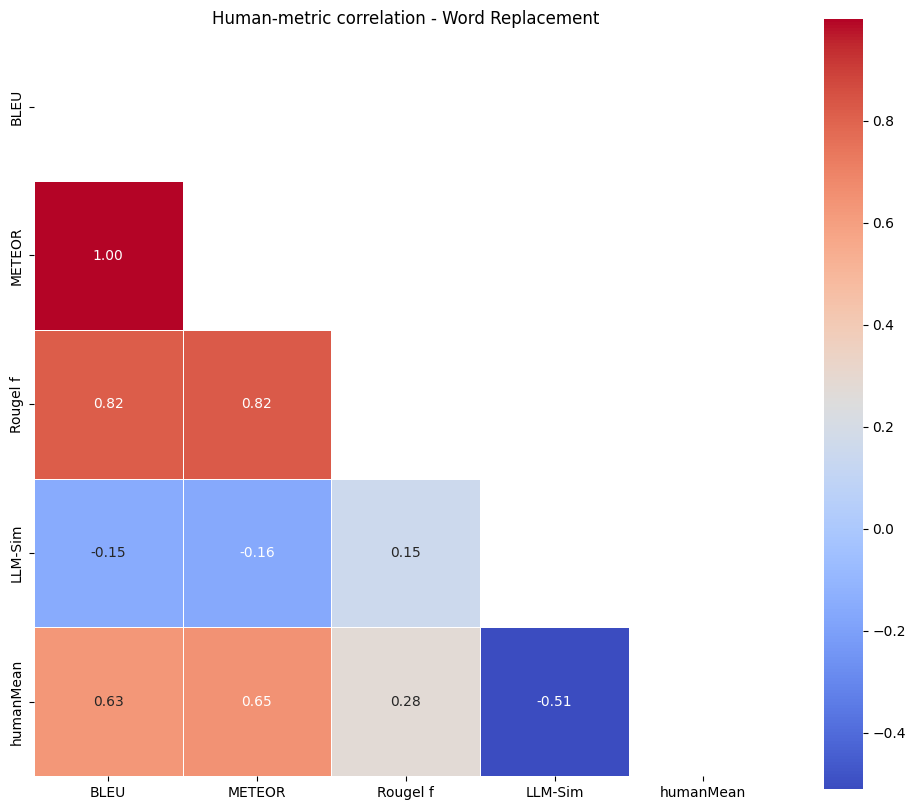

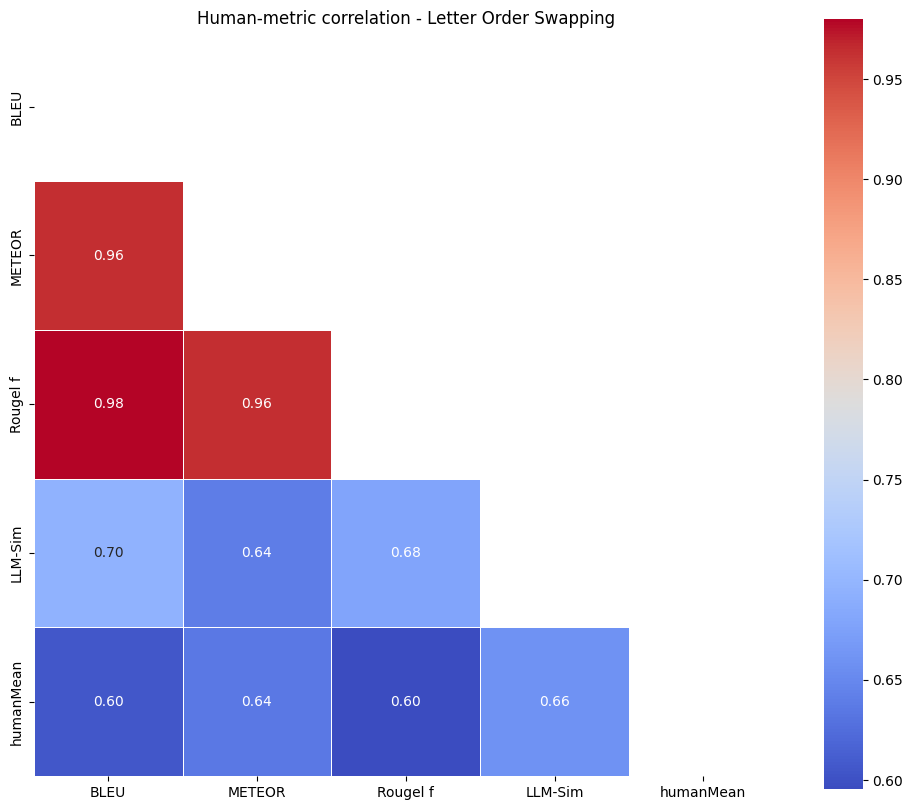

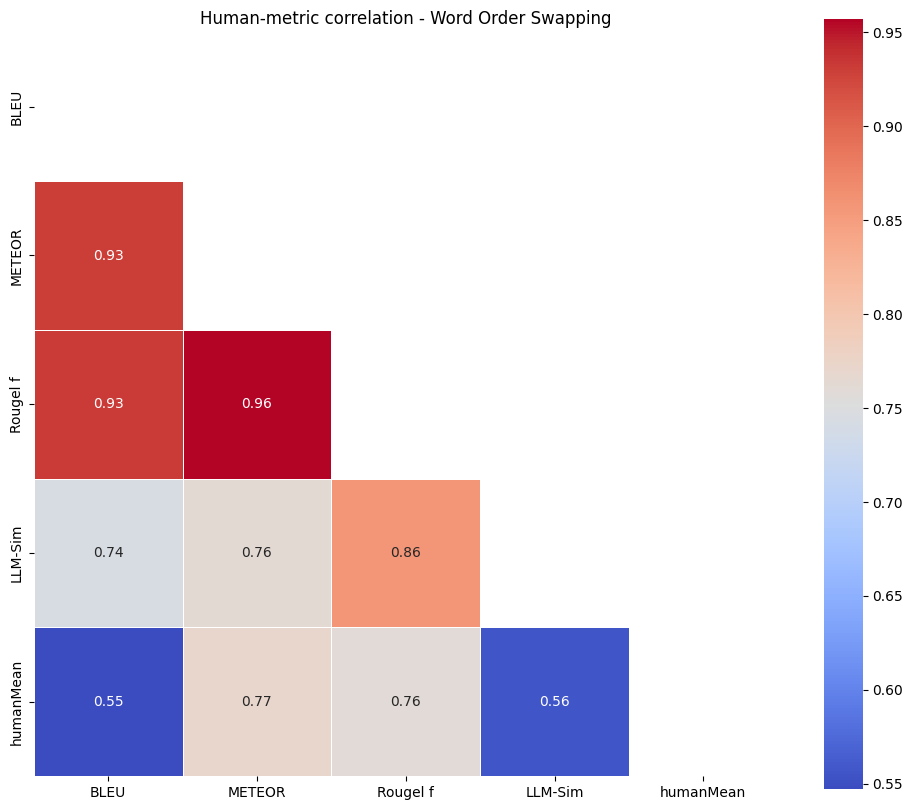

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("human_score/humanScores.csv")
dfMet = df[['BLEU', 'METEOR', 'Rougel f', 'LLM-Sim', 'humanMean']]
corr = dfMet.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", square=True, linewidths=0.5)

plt.title("Human-metric correlation - All tampering strategies")
plt.show()

for x in df["tamperingType"].unique():
    data = df[df["tamperingType"]==x]
    dfMet = data[['BLEU', 'METEOR', 'Rougel f', 'LLM-Sim', 'humanMean']]
    corr = dfMet.corr()

    mask = np.triu(np.ones_like(corr, dtype=bool))

    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", square=True, linewidths=0.5)

    plt.title(f"Human-metric correlation - {x}")
    plt.show()
    

In [4]:
import pandas as pd

df = pd.read_csv("human_score/humanScores.csv")

means = [df["humanMean"][i:i+10].mean() for i in range(0, 100, 10)]

# Print the result
for i, mean in enumerate(means, start=1):
    print(f"Bin {i}: Mean = {mean}")


Bin 1: Mean = 0.44633333333333336
Bin 2: Mean = 0.48133333333333334
Bin 3: Mean = 0.5826666666666667
Bin 4: Mean = 0.6253333333333333
Bin 5: Mean = 0.5536666666666666
Bin 6: Mean = 0.6686666666666666
Bin 7: Mean = 0.7683333333333333
Bin 8: Mean = 0.6656666666666666
Bin 9: Mean = 0.7223333333333333
Bin 10: Mean = 0.7473333333333333


In [6]:
import pandas as pd
import krippendorff

r1 = pd.read_csv('human_score/Nhu', header=None)
r2 = pd.read_csv('human_score/Oskar', header=None)
r3 = pd.read_csv('human_score/Christina', header=None)

humanData = pd.concat([r1, r2, r3], axis=1)
humanData.columns = ['rater1', 'rater2', 'rater3']

data = humanData.T.values
alpha = krippendorff.alpha(reliability_data=data, level_of_measurement='interval')

print("Krippendorff’s alpha:", alpha)


Krippendorff’s alpha: 0.5235932634259011


In [ ]:
import pandas as pd

file_path = "final_output/combinedOutput_cleaned.csv"
df = pandas.read_csv(file_path, encoding='utf-8')

std_devs = df.groupby('tamperingType')['LLM-Sim'].std()
print(std_devs)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

merged_df = pd.merge(std_devs, mean_global["LLM-Con"], on="tamperingType")

for i, row in merged_df.iterrows():
    plt.text(row["LLM-Sim"], row["LLM-Con"], str(i),
             fontsize=7, ha='left', va='bottom')

plt.scatter(merged_df['LLM-Sim'], merged_df['LLM-Con'])
plt.title('Scatter Plot of LLM Similarity STD vs LLM Evaluation Confidence')
plt.xlabel('LLM-Sim Standard Deviation')
plt.ylabel('LLM-Con')
plt.grid(True)
plt.show()

In [2]:
import pandas as pd

df = pd.read_csv('./output/combinedOutput_cleaned.csv')

count = df["originalSentence"].astype(str).str.contains(" ").sum()

print("Number of non-utf8 rows:", count)


Number of non-utf8 rows: 503
